In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv ("./Documents/Python Scripts/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
# como tengo datos de los que voy a necesitar y son nombres toca cambiarlos a numeros

In [5]:
dumm_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dumm_city_tier =pd.get_dummies(df["City Tier"], prefix ="City")

In [6]:
dumm_gender

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [7]:
dumm_city_tier


,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [8]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
df_new = df[column_names].join(dumm_gender)
column_names =df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [10]:
df_new =df_new[column_names].join(dumm_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female",
                "Gender_Male", "City_Tier 1", 
                "City_Tier 2","City_Tier 3",
               "Record",]

In [12]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [13]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print (lm.intercept_)

-79.41713030137362


In [15]:
print(lm.coef_)

[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [16]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [17]:
lm.score(X,Y)

0.9179923586131016

# Eliminar variablels dummy redundantes

In [18]:
dummy_gender = pd.get_dummies(df["Gender"] , prefix="Gender").iloc[:,1:]

In [19]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [20]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix ="City").iloc[:,1:]

In [21]:
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [22]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new =df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [23]:
feature_cols = ["Monthly Income", "Transaction Time","Gender_Male", "City_Tier 2","City_Tier 3","Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print (lm.intercept_)

-133.67781754642056


In [25]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

In [26]:
lm.score(X,Y)

0.9179923586131016

# Transformacion de variables para conseguir una relacion no lineal 

In [27]:
data_auto =pd.read_csv ("./Documents/Python Scripts/datasets/auto/auto-mpg.csv")

In [28]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [29]:
data_auto.shape

(406, 9)

In [30]:
 import matplotlib.pyplot as plt

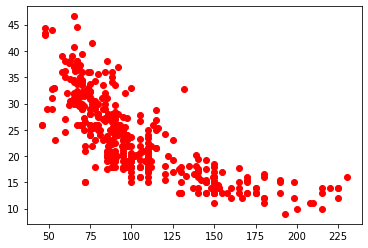

In [53]:
%matplotlib inline 
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] =data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")

# Modelo de regresion lineal 
 * mpg = a+b*horsepower

In [41]:
x = data_auto ["horsepower"].fillna(data_auto["horsepower"].mean())
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data = x[ :, np.newaxis]

In [42]:
lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

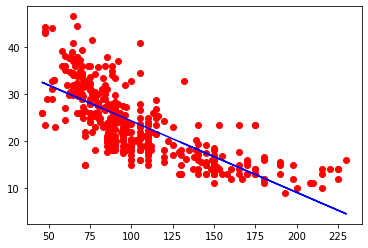

In [43]:
%matplotlib inline
plt.plot(x,y, "ro")
plt.plot (x, lm.predict(x_data), color="blue")

In [46]:
lm.score(x_data,y) #esto es r^2 

0.574653340645025

In [52]:
SSD = np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD,RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

# # Modelo de regresion lineal 
 * mpg = a+b*horsepower^2

In [54]:
x_data = x**2
x_data= x_data[: , np.newaxis]

In [56]:
lm = LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lm.score ( x_data , y )

0.4849887034823205

In [58]:
SSD = np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD,RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

# # Modelo de regresion lineal + cuadratico¶

    mpg = a+b*horsepower + c horsepower ^2



In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [60]:
poly = PolynomialFeatures ( degree=2)

In [61]:
x_data = poly.fit_transform(x[:,np.newaxis])

In [62]:
lm = linear_model.LinearRegression()
lm.fit(x_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lm.score(x_data,y )

0.6439066584257469

In [65]:
lm.intercept_

55.026192447080355

In [66]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

 mpg = 55.026 -0,34 hp + 0,0001

# El problema de los outliers

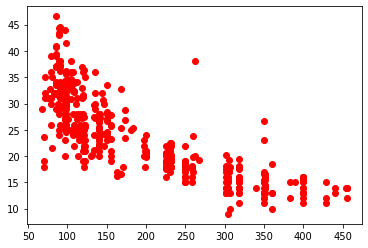

In [68]:
plt.plot (data_auto["displacement"], data_auto["mpg"], "ro")

In [76]:
x = data_auto["displacement"].fillna(data_auto["displacement"].mean())
x = x[:,np.newaxis]
y  = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lm.score(x,y)

0.6261049762826918

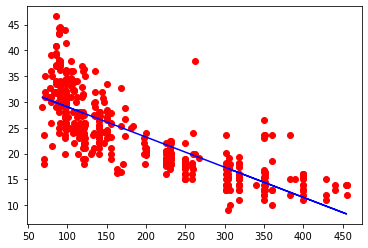

In [75]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot (x, lm.predict(x), color ="blue")

In [80]:
#para mostrar esos datos que estan muy dispersos

In [81]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [84]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [85]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [87]:
x = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
x = x[:,np.newaxis]
y  = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lm.score(x,y)

0.6466514317531822

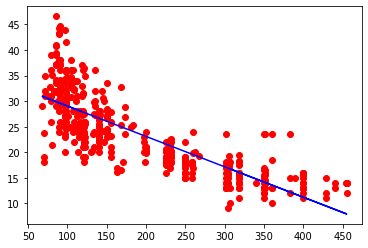

In [89]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot (x, lm.predict(x), color ="blue")